In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
import sys
sys.path.append('../')
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [3]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [4]:
df = pd.DataFrame()

In [5]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [6]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [7]:
tools.make_valid_df(df, fields)

In [8]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [9]:
# df_train_, df_other = tools.groupby(df, other=True)
# df_train_

In [10]:
name_db = 'clear_emotions'
db_path = os.path.join(databases[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [11]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [12]:
tools.make_valid_df(df_clear, fields)

In [13]:
df_clear = df_clear[fields]

In [14]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [15]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [16]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [17]:
models = []

In [18]:
# def removeprefix(text, prefix):
#     if text.startswith(prefix):
#         return text[len(prefix):]
#     return text

In [19]:
# removeprefix('model_third_6.7.5_2', 'model_third_')

In [20]:
# removeprefix('7.2.7_3', 'model_third_')

'7.2.7_3'

In [21]:
# '7.2.7_3'.split('_')

['7.2.7', '3']

In [22]:
# '7.2.7'.split('_')

['7.2.7']

### Загрузка всех 288 моделей

In [43]:
# v = 1
# layer = 'third'
# dir_path = f'../saved_models/{layer}/_{v}'
# models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
# models

['model_third_6.8.5',
 'model_third_9.8.5',
 'model_third_8.2.3',
 'model_third_7.9.9',
 'model_third_9.10.5',
 'model_third_9.7.7',
 'model_third_9.10.3',
 'model_third_8.8.5',
 'model_third_8.3.3',
 'model_third_7.6.3',
 'model_third_9.2.6',
 'model_third_9.3.6',
 'model_third_7.6.8',
 'model_third_6.10.7',
 'model_third_9.2.3',
 'model_third_9.6.9',
 'model_third_7.7.6',
 'model_third_9.7.3',
 'model_third_9.3.4',
 'model_third_8.9.8',
 'model_third_9.4.6',
 'model_third_9.2.4',
 'model_third_6.10.9',
 'model_third_9.3.5',
 'model_third_7.3.5',
 'model_third_6.6.7',
 'model_third_7.8.7',
 'model_third_7.10.6',
 'model_third_7.8.3',
 'model_third_9.5.4',
 'model_third_6.8.8',
 'model_third_9.5.9',
 'model_third_7.3.6',
 'model_third_9.2.7',
 'model_third_7.2.8',
 'model_third_9.2.9',
 'model_third_9.6.2',
 'model_third_7.2.2',
 'model_third_9.3.9',
 'model_third_8.4.5',
 'model_third_7.10.8',
 'model_third_7.2.6',
 'model_third_7.3.7',
 'model_third_8.8.4',
 'model_third_7.9.3',
 'mo

In [ ]:
# for i in range(len(models)):
#     model_layers_v = removeprefix(models[i], 'model_third_')
#     N = model_layers_v.split('_')[0]
#     path = os.path.join(dir_path, models[i])
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], )
#     models[i] = [model_name, N, nn]

In [78]:
# def load_models(path_to_saved_models, df, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
#     for i in range(len(models)):
#         model_layers_v = removeprefix(models[i], f'model_{layer}_')
#         N = model_layers_v.split('_')[0]
#         path = os.path.join(dir_path, models[i])
#         model = load_model(path)
#         nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#         models[i] = [model_layers_v, N, nn]
    
#     models.sort(key=lambda x: list(map(int, x[1].split('.'))))
    
#     return models

In [18]:
v = 1
layer = 'second'
models = tools.load_models('../saved_models', df, layer, v)
models

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['2.2_1', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c90589370>],
 ['2.3_1', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f6ca6155fd0>],
 ['2.4_1', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c597b5e80>],
 ['2.5_1', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f6ca5fe3ca0>],
 ['2.6_1', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f6c9c6e2be0>],
 ['2.7_1', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f6c5b7f8b50>],
 ['2.8_1', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bdebc70>],
 ['2.9_1', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bbb3d30>],
 ['3.2_1', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c5a83ad00>],
 ['3.3_1', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f6c5ad9ce50>],
 ['3.4_1', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c9044de50>],
 ['3.5_1', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bf97c70>],
 ['3.6_1', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [19]:
len(models)

64

In [ ]:
# v = 1
# i = 0
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

In [2]:
# v = 5
# i = 0
# seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

7.9.8


In [20]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [144]:
metrics = tools.metrics

In [43]:
# def create_df_metrics(models, test, df_metrics, layer='first'):
#     for model_list in models:
#         entry_dict = {'model': model_list[0], 'layer': layer, 'N': model_list[1]}
#         entry_dict.update({metric: model_list[2].model_metric(test, metric) for metric in metrics})
#         df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     return df_metrics

In [21]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [22]:
layer

'second'

In [23]:
models

[['2.2_1', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c90589370>],
 ['2.3_1', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f6ca6155fd0>],
 ['2.4_1', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c597b5e80>],
 ['2.5_1', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f6ca5fe3ca0>],
 ['2.6_1', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f6c9c6e2be0>],
 ['2.7_1', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f6c5b7f8b50>],
 ['2.8_1', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bdebc70>],
 ['2.9_1', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bbb3d30>],
 ['3.2_1', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c5a83ad00>],
 ['3.3_1', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f6c5ad9ce50>],
 ['3.4_1', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c9044de50>],
 ['3.5_1', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bf97c70>],
 ['3.6_1', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [24]:
df_metrics = tools.create_df_metrics(models, test, df_metrics, layer=layer)
df_metrics

,model,layer,N,mean,norm,stat
0,2.2_1,second,2.2,0.079602,0.219791,0.519760
1,2.3_1,second,2.3,0.067630,0.184987,0.477011
2,2.4_1,second,2.4,0.064355,0.174966,0.488077
3,2.5_1,second,2.5,0.087434,0.262844,0.507587
4,2.6_1,second,2.6,0.065946,0.181153,0.484206
...,...,...,...,...,...,...
59,9.5_1,second,9.5,0.054982,0.151440,0.500078
60,9.6_1,second,9.6,0.053667,0.146367,0.495178
61,9.7_1,second,9.7,0.057731,0.158434,0.518432
62,9.8_1,second,9.8,0.054054,0.149069,0.517090


In [30]:
df_metrics.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
53,8.7_1,second,8.7,0.052475,0.143937,0.518746
55,8.9_1,second,8.9,0.052704,0.144394,0.506074
45,7.7_1,second,7.7,0.053041,0.146264,0.508565
35,6.5_1,second,6.5,0.053256,0.147293,0.499225
47,7.9_1,second,7.9,0.053260,0.146635,0.510857
44,7.6_1,second,7.6,0.053596,0.146118,0.512590
60,9.6_1,second,9.6,0.053667,0.146367,0.495178
63,9.9_1,second,9.9,0.053672,0.149908,0.520238
31,5.9_1,second,5.9,0.054028,0.148495,0.520167
62,9.8_1,second,9.8,0.054054,0.149069,0.517090


In [31]:
df_metrics

,model,layer,N,mean,norm,stat
0,2.2_1,second,2.2,0.079602,0.219791,0.519760
1,2.3_1,second,2.3,0.067630,0.184987,0.477011
2,2.4_1,second,2.4,0.064355,0.174966,0.488077
3,2.5_1,second,2.5,0.087434,0.262844,0.507587
4,2.6_1,second,2.6,0.065946,0.181153,0.484206
...,...,...,...,...,...,...
59,9.5_1,second,9.5,0.054982,0.151440,0.500078
60,9.6_1,second,9.6,0.053667,0.146367,0.495178
61,9.7_1,second,9.7,0.057731,0.158434,0.518432
62,9.8_1,second,9.8,0.054054,0.149069,0.517090


In [36]:
v = 5

In [37]:
layer = 'second'

In [38]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_5/df_metrics_5.db'

In [28]:
tools.save_to_db(db_path, name_db, df_metrics)

OperationalError: unable to open database file

In [39]:
connection = sqlite3.connect(db_path)
df_metrics = pd.read_sql(f'select * from {name_db}', con=connection)

In [40]:
df_metrics.sort_values('mean')[:10]

,model,layer,N,mean,norm,stat
35,6.5_5,second,6.5,0.0501279475551772,0.138740217714815,0.529376924037933
63,9.9_5,second,9.9,0.0502186964024779,0.139397128638758,0.569503605365753
30,5.8_5,second,5.8,0.0506120332343425,0.141581798111536,0.559873521327972
55,8.9_5,second,8.9,0.0506208816739493,0.139898556419205,0.524054229259491
53,8.7_5,second,8.7,0.0506694378995131,0.13949851249329,0.54528272151947
47,7.9_5,second,7.9,0.0509295412528139,0.140437375858906,0.548664510250092
60,9.6_5,second,9.6,0.0509397450573917,0.140929614975234,0.52058869600296
46,7.8_5,second,7.8,0.0510306151161938,0.141448645618122,0.541710674762726
62,9.8_5,second,9.8,0.0511900853752109,0.142699718802754,0.563049137592316
36,6.6_5,second,6.6,0.0512698039758783,0.142919031487379,0.521103501319885


In [35]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


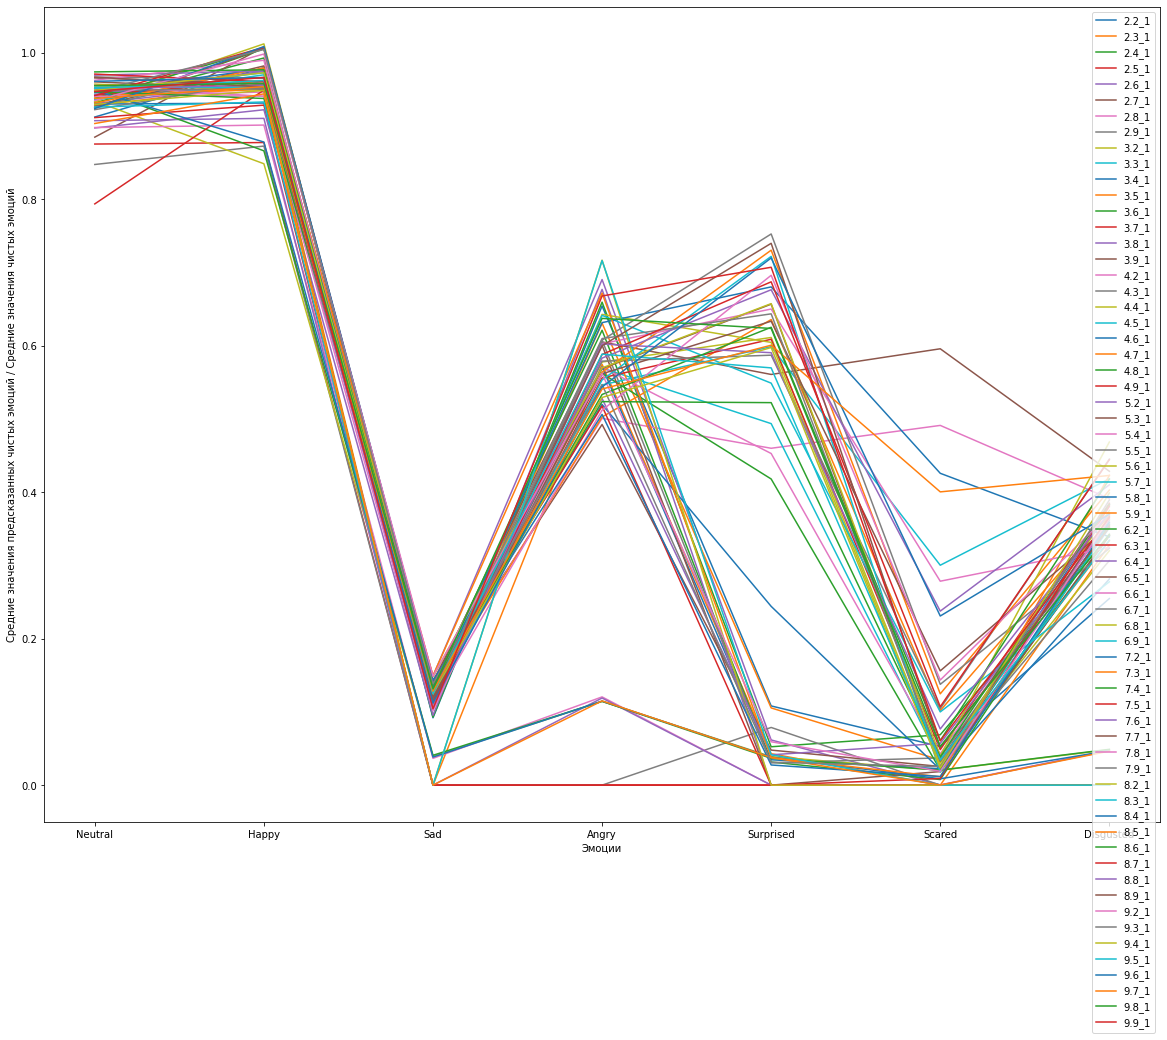

In [36]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [37]:
df_clear_metrics.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
55,8.9_1,0.966876,0.953433,0.115253,0.600112,0.739952,0.051434,0.351792,0.539836
46,7.8_1,0.962649,0.989977,0.112799,0.511971,0.696261,0.143520,0.370063,0.541034
38,6.8_1,0.952629,0.961622,0.147796,0.569755,0.657581,0.039828,0.468590,0.542543
63,9.9_1,0.947284,0.966458,0.104238,0.668034,0.707238,0.060441,0.365228,0.545560
37,6.7_1,0.922476,0.961530,0.118134,0.607664,0.752703,0.137662,0.323307,0.546211
31,5.9_1,0.955299,0.958692,0.112334,0.564045,0.730553,0.124705,0.402924,0.549793
36,6.6_1,0.955617,0.940557,0.101638,0.602781,0.650208,0.278521,0.324662,0.550569
6,2.8_1,0.942602,0.941000,0.130862,0.500938,0.460052,0.491264,0.391291,0.551144
53,8.7_1,0.971071,0.960680,0.113241,0.588129,0.687345,0.107102,0.444443,0.553145
60,9.6_1,0.961157,0.966416,0.112079,0.543754,0.719949,0.230961,0.370031,0.557764


In [33]:
df_clear_metrics[df_clear_metrics.model == '7.10.9']

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
143,7.10.9,0.980029,0.964971,0.166464,0.783942,0.651393,0.11358,0.377155,0.576791


In [62]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,6.2.2,0.715441,0.121323,3.305487e-02,0.082387,3.467796e-02,0.013991,3.089980e-02,0.147396
1,6.2.3,0.926011,1.000152,1.449917e-01,0.488079,1.106424e-07,0.001509,3.940406e-01,0.422112
2,6.2.4,0.953215,0.972401,1.767203e-09,0.128289,1.965968e-06,0.000010,1.278544e-07,0.293417
3,6.2.5,0.940826,0.962519,1.126983e-01,0.663909,4.066704e-02,0.022834,4.467096e-01,0.455737
4,6.2.6,0.964983,0.960879,1.220255e-01,0.585265,4.691323e-02,0.082137,3.704786e-01,0.447526
...,...,...,...,...,...,...,...,...,...
283,9.10.5,0.965820,0.941238,1.106152e-01,0.589198,6.130167e-01,0.065501,3.589251e-01,0.520616
284,9.10.6,0.974131,0.958857,1.304282e-01,0.534498,6.702796e-01,0.028919,3.908384e-01,0.526850
285,9.10.7,0.972031,0.947156,1.140796e-01,0.608389,6.363772e-01,0.051461,3.201075e-01,0.521372
286,9.10.8,0.966055,0.969861,1.282658e-01,0.580584,6.944896e-01,0.020572,3.898168e-01,0.535663


In [43]:
v = 1
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_1/df_clear_metrics_1.db'

In [39]:
tools.save_to_db(db_path, name_db, df_clear_metrics)

In [44]:
connection = sqlite3.connect(db_path)
df_clear_metrics = pd.read_sql(f'select * from {name_db}', con=connection)

In [47]:
df_clear_metrics.sort_values('clear')[-10:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
31,5.9_1,0.955299057019295,0.958692094259389,0.112333597405777,0.564044654160703,0.73055339986206,0.12470537833139,0.402923576277414,0.549793108188004
36,6.6_1,0.955616790291046,0.940556537132672,0.101637989046457,0.602780673718091,0.650208099092188,0.278520554888482,0.324661621087783,0.550568895036674
6,2.8_1,0.94260225784635,0.940999824683254,0.130861572531626,0.500937999338086,0.46005199939696,0.491264345599156,0.391290819309302,0.551144116957819
53,8.7_1,0.971071171161958,0.960679719517431,0.113241400469313,0.588129159310874,0.687345417114163,0.107102183734669,0.444442934984957,0.553144569470481
60,9.6_1,0.961157260415116,0.966415542391492,0.112078596266627,0.543754142529767,0.719948640045315,0.230961176110249,0.370030638075223,0.557763713690541
19,4.5_1,0.945366409560276,0.972900431291191,0.128338315927094,0.546544875119364,0.598779521608121,0.300320690753413,0.418449312106661,0.55867136519516
44,7.6_1,0.969583305881373,0.975184255008126,0.110074855304558,0.583188441976505,0.676532393118174,0.237649723010905,0.410154415245971,0.566052484220802
61,9.7_1,0.937832547927735,0.953885272272353,0.128352970309945,0.540973447445811,0.600776297918536,0.400499122984269,0.422910772598076,0.569318633065246
30,5.8_1,0.947146093049665,0.978223792108852,0.127149740508544,0.631617998993383,0.680408952466476,0.425863265991211,0.338982087603699,0.589913132960261
15,3.9_1,0.926918048083867,0.98219565377568,0.14111532603882,0.605229825094395,0.560860964388712,0.595912454175014,0.428626385669887,0.605836951032339


In [41]:
v = 2
models_2 = tools.load_models('../saved_models', df, layer, v)
models_2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['2.2_2', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c5828e730>],
 ['2.3_2', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f6c4f40c760>],
 ['2.4_2', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c4d9e1ee0>],
 ['2.5_2', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f6c4d645880>],
 ['2.6_2', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f6c446deaf0>],
 ['2.7_2', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f6c441fcfa0>],
 ['2.8_2', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f6c14303250>],
 ['2.9_2', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f6c58f9dfd0>],
 ['3.2_2', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c447c1340>],
 ['3.3_2', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f6bf8540d00>],
 ['3.4_2', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f6caf53bd00>],
 ['3.5_2', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f6c447e3ca0>],
 ['3.6_2', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [42]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

,model,layer,N,mean,norm,stat


In [43]:
layer

'second'

In [44]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [45]:
df_metrics_2 = tools.create_df_metrics(models_2, test, df_metrics_2, layer=layer)
df_metrics_2

,model,layer,N,mean,norm,stat
0,2.2_2,second,2.2,0.109211,0.309075,0.474702
1,2.3_2,second,2.3,0.092502,0.246138,0.452962
2,2.4_2,second,2.4,0.084777,0.224502,0.459267
3,2.5_2,second,2.5,0.112793,0.366444,0.462559
4,2.6_2,second,2.6,0.094495,0.245563,0.467889
...,...,...,...,...,...,...
59,9.5_2,second,9.5,0.067859,0.192021,0.481607
60,9.6_2,second,9.6,0.077945,0.213585,0.477428
61,9.7_2,second,9.7,0.076820,0.217767,0.495396
62,9.8_2,second,9.8,0.076117,0.210920,0.499687


In [46]:
df_metrics_2.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
59,9.5_2,second,9.5,0.067859,0.192021,0.481607
39,6.9_2,second,6.9,0.068700,0.187794,0.482810
45,7.7_2,second,7.7,0.071668,0.197992,0.486251
52,8.6_2,second,8.6,0.072215,0.197312,0.480296
27,5.5_2,second,5.5,0.073160,0.205780,0.489748
28,5.6_2,second,5.6,0.073205,0.200201,0.478942
63,9.9_2,second,9.9,0.073377,0.205657,0.497745
37,6.7_2,second,6.7,0.073537,0.207244,0.491961
33,6.3_2,second,6.3,0.073834,0.226469,0.456982
48,8.2_2,second,8.2,0.073839,0.215817,0.449477


In [47]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [48]:
len(models_2)

64

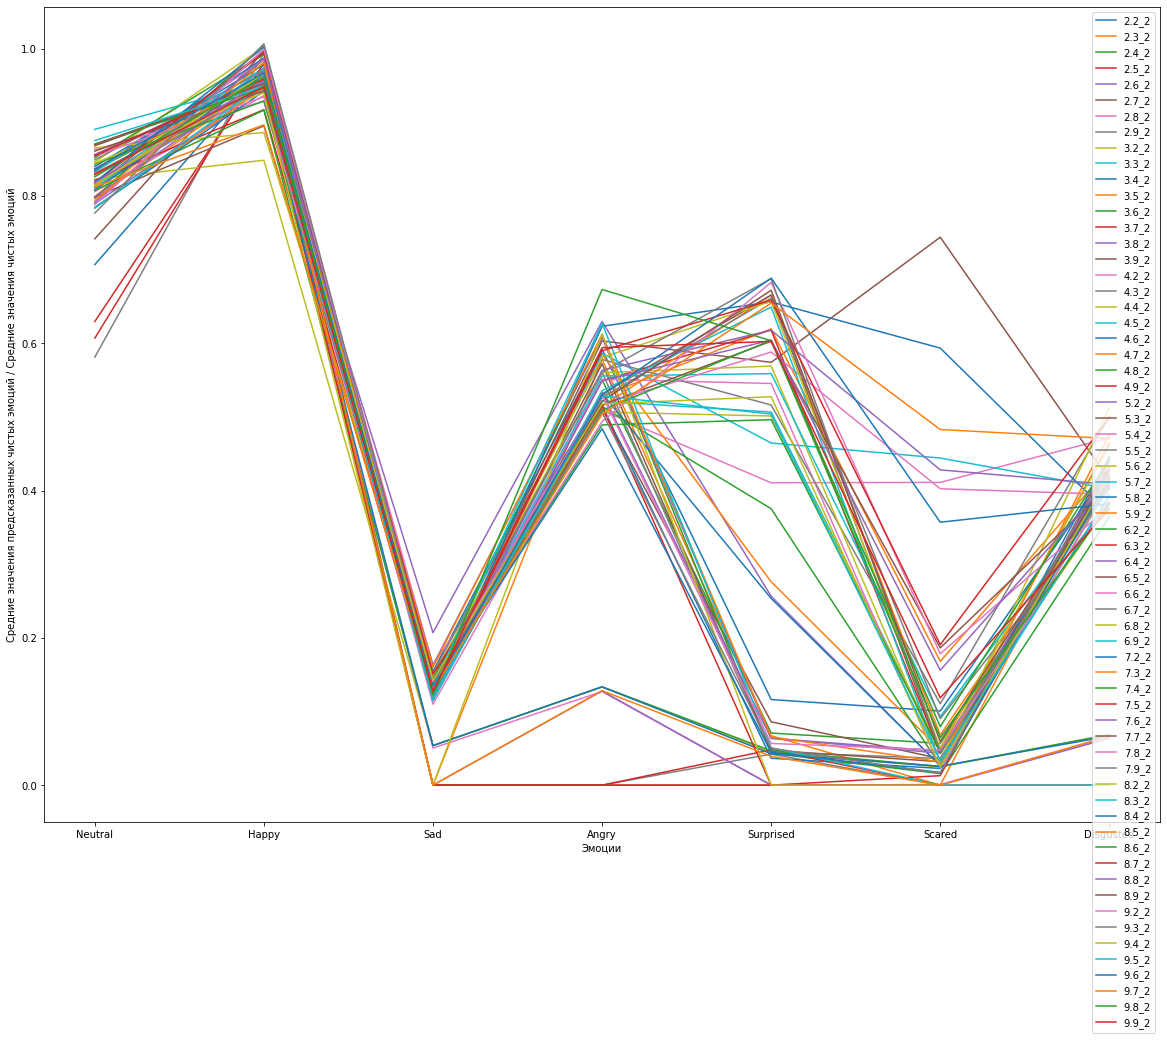

In [49]:
kwargs = {
    'models': models_2, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [50]:
df_clear_metrics_2.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
55,8.9_2,0.869826,0.952633,0.139786,0.521387,0.671988,0.059279,0.419456,0.519193
45,7.7_2,0.860868,0.942670,0.122051,0.516198,0.602809,0.186452,0.406459,0.519644
38,6.8_2,0.816443,0.952336,0.133436,0.580558,0.656952,0.050533,0.461202,0.521637
21,4.7_2,0.828206,0.959040,0.117480,0.528030,0.619517,0.168046,0.431562,0.521697
46,7.8_2,0.854213,0.934704,0.133097,0.493658,0.682579,0.178452,0.378427,0.522161
27,5.5_2,0.849086,0.970143,0.152343,0.577988,0.516185,0.110539,0.500968,0.525322
6,2.8_2,0.832609,0.985024,0.162841,0.508760,0.410533,0.411081,0.471491,0.540334
36,6.6_2,0.818933,0.953975,0.109824,0.516974,0.588135,0.402420,0.394887,0.540735
19,4.5_2,0.810518,0.972257,0.129086,0.586439,0.464560,0.444143,0.402403,0.544201
53,8.7_2,0.854323,0.958932,0.125116,0.589843,0.658620,0.190685,0.499456,0.553854


In [51]:
metrics = tools.metrics + ['clear']

In [52]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':     model   layer    N      mean      norm      stat
 0   2.2_2  second  2.2  0.109211  0.309075  0.474702
 1   2.3_2  second  2.3  0.092502  0.246138  0.452962
 2   2.4_2  second  2.4  0.084777  0.224502  0.459267
 3   2.5_2  second  2.5  0.112793  0.366444  0.462559
 4   2.6_2  second  2.6  0.094495  0.245563  0.467889
 ..    ...     ...  ...       ...       ...       ...
 59  9.5_2  second  9.5  0.067859  0.192021  0.481607
 60  9.6_2  second  9.6  0.077945  0.213585  0.477428
 61  9.7_2  second  9.7  0.076820  0.217767  0.495396
 62  9.8_2  second  9.8  0.076117  0.210920  0.499687
 63  9.9_2  second  9.9  0.073377  0.205657  0.497745
 
 [64 rows x 6 columns],
 'norm':     model   layer    N      mean      norm      stat
 0   2.2_2  second  2.2  0.109211  0.309075  0.474702
 1   2.3_2  second  2.3  0.092502  0.246138  0.452962
 2   2.4_2  second  2.4  0.084777  0.224502  0.459267
 3   2.5_2  second  2.5  0.112793  0.366444  0.462559
 4   2.6_2  second  2.6  0.094495  0.245

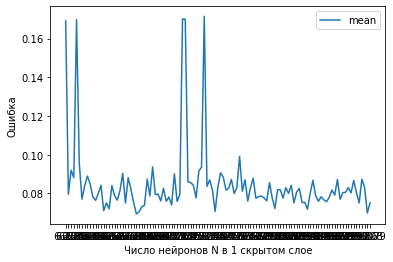

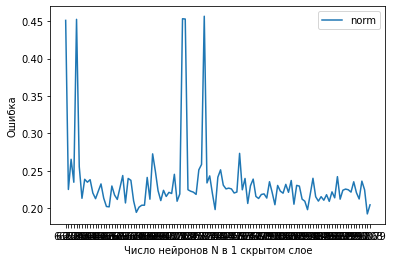

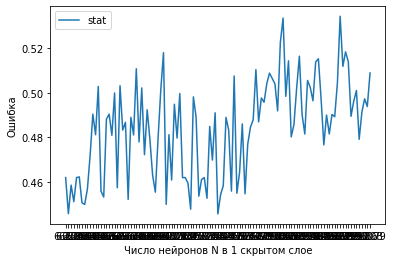

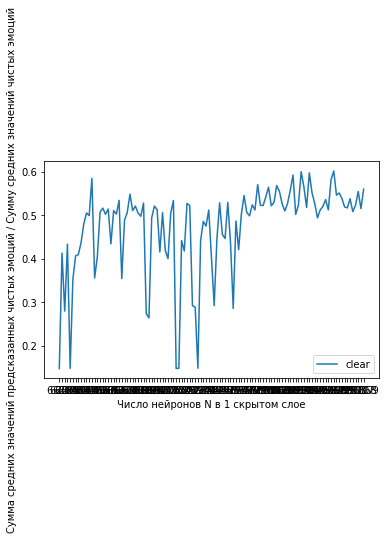

In [35]:
tools.plot_metrics(metric_df_dict)

In [36]:
v

2

In [46]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/third/_2/df_metrics_2.db'

In [40]:
tools.save_to_db(db_path, name_db, df_metrics_2)

In [47]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,6.2.2_2,third,6.2.2,0.169140931334522,0.450899806660003,0.462031185626984
1,6.2.3_2,third,6.2.3,0.0796015158666296,0.225136494756775,0.445875436067581
2,6.2.4_2,third,6.2.4,0.0920220418928106,0.265426937260013,0.458662331104279
3,6.2.5_2,third,6.2.5,0.0881856537945635,0.234774802099187,0.451269298791885
4,6.2.8_2,third,6.2.8,0.169853379482445,0.45229713300235,0.462031185626984
...,...,...,...,...,...,...
108,9.9.8_2,third,9.9.8,0.0751136710441503,0.212435678128792,0.479149609804153
109,9.10.6_2,third,9.10.6,0.0873792446945505,0.23624483268056,0.491315424442291
110,9.10.7_2,third,9.10.7,0.0831332774232427,0.224626650084966,0.497254908084869
111,9.10.8_2,third,9.10.8,0.0698709265001664,0.192483781889229,0.493836015462875


In [42]:
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,6.2.2_2,0.560906,0.182232,5.340186e-02,0.122961,3.493534e-02,2.243431e-02,5.762880e-02,0.147786
1,6.2.3_2,0.816131,0.982911,1.387864e-01,0.508359,6.747112e-10,6.084949e-05,4.449427e-01,0.413027
2,6.2.4_2,0.831594,0.989780,8.657468e-12,0.136943,2.588999e-09,4.731043e-08,3.221929e-10,0.279760
3,6.2.5_2,0.810319,0.927203,1.501696e-01,0.602514,7.401464e-02,3.562776e-02,4.347562e-01,0.433515
4,6.2.8_2,0.558998,0.182854,5.401141e-02,0.125293,3.568598e-02,2.272480e-02,5.808365e-02,0.148236
...,...,...,...,...,...,...,...,...,...
108,9.9.8_2,0.815096,0.951985,1.217749e-01,0.557730,7.031688e-01,2.852706e-02,3.795778e-01,0.508266
109,9.10.6_2,0.809280,0.985052,1.295795e-01,0.538257,7.119305e-01,4.787556e-02,4.366622e-01,0.522662
110,9.10.7_2,0.829739,0.960507,1.271270e-01,0.542342,6.590641e-01,3.032683e-01,4.593479e-01,0.554485
111,9.10.8_2,0.877667,0.962875,1.273457e-01,0.583329,6.467852e-01,3.018194e-02,3.779340e-01,0.515160


In [48]:
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/third/_2/df_clear_metrics_2.db'

In [50]:
tools.save_to_db(db_path, name_db, df_clear_metrics_2)

In [51]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,6.2.2_2,0.560906169900701,0.182231996113118,0.0534018604955658,0.122960920651012,0.0349353374997471,0.0224343117545633,0.0576288036310636,0.147785628577967
1,6.2.3_2,0.816130545655667,0.982910766138594,0.138786444573319,0.508358745619464,6.74711213469114e-10,6.08494897902596e-05,0.444942737644979,0.413027155685218
2,6.2.4_2,0.831593564880894,0.989780419769053,8.65746795656402e-12,0.136943433777176,2.58899920265428e-09,4.73104326956405e-08,3.22192944320524e-10,0.279759638379629
3,6.2.5_2,0.81031869737244,0.927202906985004,0.150169602192336,0.602514190184194,0.0740146397757315,0.0356277597008967,0.434756216838785,0.433514859007055
4,6.2.8_2,0.558998492767091,0.182853752196083,0.0540114142201404,0.125292544465082,0.0356859770228748,0.0227247967439539,0.0580836464267329,0.148235803405994
...,...,...,...,...,...,...,...,...,...
108,9.9.8_2,0.815096072309673,0.951985105393153,0.12177491291956,0.557729594209509,0.703168834887751,0.0285270605601516,0.379577822928881,0.508265629029811
109,9.10.6_2,0.809279965682768,0.985051736825409,0.129579458674992,0.538256527245254,0.711930469144459,0.0478755646184379,0.436662167031027,0.522662269888907
110,9.10.7_2,0.829738752042354,0.960506562354553,0.127126986128404,0.542342036858184,0.659064110821531,0.303268315745335,0.459347918583032,0.554484954647627
111,9.10.8_2,0.87766744429103,0.962874651111609,0.127345735647032,0.583329456689895,0.646785222630769,0.0301819422519675,0.377934002652531,0.515159779324976


In [17]:
v = 3
layer = 'second'
models_3 = tools.load_models('../saved_models', df, layer, v)
models_3

[['2.2_3', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f4a187919d0>],
 ['2.3_3', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f4a190b11f0>],
 ['2.4_3', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f4a1960f1f0>],
 ['2.5_3', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f4a1a046ca0>],
 ['2.6_3', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f4a18ace040>],
 ['2.7_3', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f4a6338d760>],
 ['2.8_3', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f4a199b4b50>],
 ['2.9_3', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f4a18c12d00>],
 ['3.2_3', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f4a19f12dc0>],
 ['3.3_3', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f4a0bff2e80>],
 ['3.4_3', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f4a1a7fe700>],
 ['3.5_3', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f4a1ac91ca0>],
 ['3.6_3', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [18]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

,model,layer,N,mean,norm,stat


In [20]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [21]:
df_metrics_3 = tools.create_df_metrics(models_3, test, df_metrics_3, layer=layer)
df_metrics_3

,model,layer,N,mean,norm,stat
0,2.2_3,second,2.2,0.080276,0.218700,0.506784
1,2.3_3,second,2.3,0.066868,0.182144,0.480074
2,2.4_3,second,2.4,0.061406,0.166451,0.476887
3,2.5_3,second,2.5,0.085364,0.251533,0.500324
4,2.6_3,second,2.6,0.062303,0.169578,0.539918
...,...,...,...,...,...,...
59,9.5_3,second,9.5,0.053523,0.147874,0.516639
60,9.6_3,second,9.6,0.051713,0.142617,0.513967
61,9.7_3,second,9.7,0.055785,0.156031,0.547727
62,9.8_3,second,9.8,0.051909,0.144393,0.553666


In [22]:
df_metrics_3.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
53,8.7_3,second,8.7,0.050492,0.139469,0.541279
35,6.5_3,second,6.5,0.051032,0.141181,0.510518
39,6.9_3,second,6.9,0.051641,0.143591,0.504969
60,9.6_3,second,9.6,0.051713,0.142617,0.513967
63,9.9_3,second,9.9,0.051880,0.143980,0.542926
44,7.6_3,second,7.6,0.051883,0.142836,0.543409
62,9.8_3,second,9.8,0.051909,0.144393,0.553666
30,5.8_3,second,5.8,0.051931,0.144652,0.546747
47,7.9_3,second,7.9,0.052009,0.142987,0.510768
27,5.5_3,second,5.5,0.052043,0.143763,0.536518


In [23]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_3/df_metrics_3.db'

In [24]:
tools.save_to_db(db_path, name_db, df_metrics_3)

In [25]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,2.2_3,second,2.2,0.0802757162762275,0.21869971151864,0.506783545017242
1,2.3_3,second,2.3,0.066867751772597,0.182144027321167,0.48007395863533
2,2.4_3,second,2.4,0.0614058954012621,0.166451366539492,0.476886510848999
3,2.5_3,second,2.5,0.0853635525213403,0.25153331484578,0.500323951244354
4,2.6_3,second,2.6,0.0623032461850553,0.169577705445355,0.539918065071106
...,...,...,...,...,...,...
59,9.5_3,second,9.5,0.053522646451703,0.147874290787914,0.516638875007629
60,9.6_3,second,9.6,0.0517129752636857,0.142616609404184,0.513967037200928
61,9.7_3,second,9.7,0.0557850921842119,0.156030741527876,0.547726809978485
62,9.8_3,second,9.8,0.0519085830789802,0.144392982765794,0.553666055202484


In [26]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [27]:
len(models_3)

64

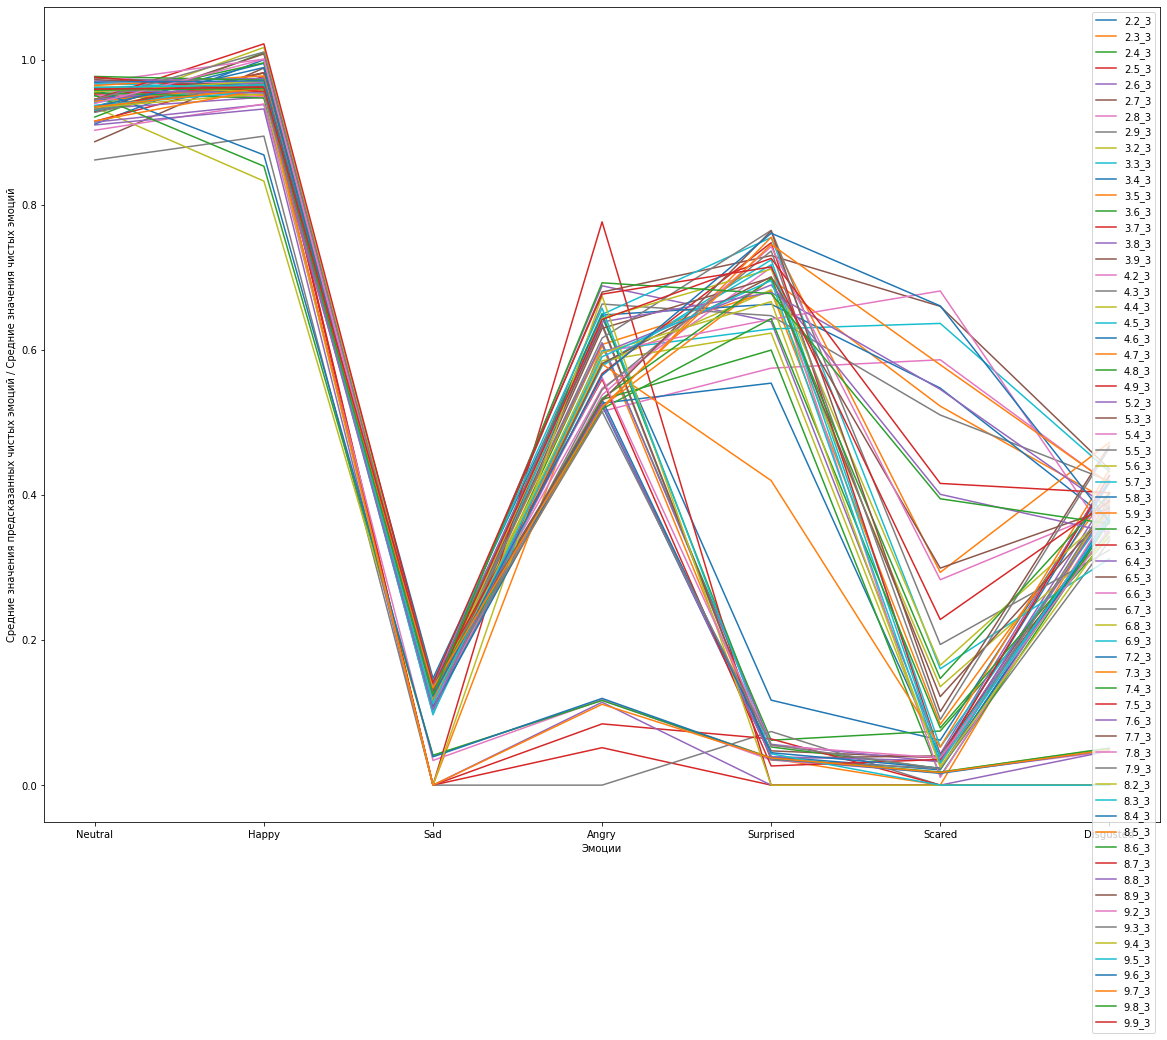

In [28]:
kwargs = {
    'models': models_3, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [87]:
df_clear_metrics_3.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
21,6.8.9_3,0.974861,0.963609,0.123001,0.595046,0.679443,0.615103,0.401769,0.621833
88,9.10.9_3,0.973723,0.945555,0.145877,0.685464,0.736119,0.265045,0.642260,0.627721
81,9.7.7_3,0.967246,0.959201,0.163343,0.724255,0.709179,0.609601,0.357279,0.641443
48,7.5.8_3,0.961335,0.959143,0.121391,0.620510,0.757141,0.691672,0.395368,0.643794
78,9.6.7_3,0.978401,1.026232,0.109360,0.696175,0.726097,0.567380,0.407206,0.644407
55,7.9.8_3,0.971415,0.985770,0.123713,0.714343,0.657268,0.489723,0.622635,0.652124
16,6.7.9_3,0.970251,0.966050,0.148763,0.842641,0.690886,0.589966,0.365715,0.653467
59,7.10.9_3,0.976738,0.965193,0.151273,0.850447,0.733776,0.487774,0.448819,0.659146
64,8.7.9_3,0.968182,0.994887,0.121969,0.625719,0.749484,0.826006,0.380493,0.666677
70,8.10.8_3,0.969363,0.977990,0.133581,0.708290,0.786975,0.756526,0.354966,0.669670


In [29]:
v = 3
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_3/df_clear_metrics_3.db'

In [30]:
tools.save_to_db(db_path, name_db, df_clear_metrics_3)

In [31]:
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,2.2_3,0.911102,0.999804,1.470983e-01,0.645239,1.171304e-01,6.191474e-02,4.197287e-01,0.471717
1,2.3_3,0.931721,0.981498,6.553812e-10,0.606205,3.664173e-02,4.455040e-07,3.905085e-01,0.420939
2,2.4_3,0.949809,0.957608,1.086554e-01,0.608900,6.190834e-02,7.458245e-02,3.423049e-01,0.443395
3,2.5_3,0.914939,0.976490,2.874756e-16,0.051606,1.464781e-09,1.023843e-13,2.645317e-13,0.277577
4,2.6_3,0.931887,0.948182,1.315304e-01,0.688183,6.387061e-01,4.303380e-02,4.273196e-01,0.544120
...,...,...,...,...,...,...,...,...,...
59,9.5_3,0.961571,0.965072,1.125772e-01,0.590433,6.954321e-01,3.051735e-02,3.682827e-01,0.531984
60,9.6_3,0.968857,0.970653,1.225790e-01,0.564805,7.606825e-01,6.604604e-01,3.627641e-01,0.630115
61,9.7_3,0.935005,0.960596,1.340790e-01,0.521033,7.452597e-01,5.793400e-01,4.155649e-01,0.612983
62,9.8_3,0.957864,0.960016,1.246473e-01,0.692328,6.774503e-01,3.946602e-01,3.602054e-01,0.595310


In [32]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,2.2_3,0.911102498835704,0.999804310013475,0.147098281587549,0.645239016556267,0.117130427413553,0.0619147411164116,0.41972866769379,0.471716849030964
1,2.3_3,0.931721338084046,0.981498267701176,6.55381234402961e-10,0.606205360474915,0.0366417314440447,4.45503970098014e-07,0.390508469501054,0.420939373337798
2,2.4_3,0.949808592016684,0.957608314199675,0.108655413432658,0.6089001247179,0.0619083407378346,0.0745824519910065,0.34230490670587,0.443395449114518
3,2.5_3,0.914939083987826,0.976490395715089,2.87475569920842e-16,0.0516061215306107,1.46478127287931e-09,1.02384273753208e-13,2.64531735163497e-13,0.277576514671239
4,2.6_3,0.931887109320026,0.948181773806567,0.131530425675131,0.688183382762077,0.638706100906574,0.043033804817527,0.427319589571113,0.544120312408431
...,...,...,...,...,...,...,...,...,...
59,9.5_3,0.9615714147544,0.965071863662016,0.112577192426295,0.590432583242481,0.695432056727883,0.0305173535119085,0.368282711667488,0.531983596570353
60,9.6_3,0.968856954117117,0.970653363554633,0.122579019487188,0.564805301234491,0.760682491563608,0.660460369259704,0.36276412333388,0.630114517507232
61,9.7_3,0.935005129393472,0.960596301689623,0.134078965842629,0.521032718404728,0.745259696530998,0.579339967054479,0.415564888585223,0.612982523928736
62,9.8_3,0.957863796582196,0.960015765744227,0.12464726287665,0.692327648505586,0.677450321216066,0.394660205233331,0.360205350006708,0.595310050023538


In [33]:
v = 4
models_4 = tools.load_models('../saved_models', df, layer, v)
models_4

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['2.2_4', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f4a07fe9c70>],
 ['2.3_4', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f49ec636100>],
 ['2.4_4', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f4a08b88cd0>],
 ['2.5_4', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f4a08aa4d90>],
 ['2.6_4', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f4a064e5760>],
 ['2.7_4', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f4a08128880>],
 ['2.8_4', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f49940b3100>],
 ['2.9_4', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f4974634520>],
 ['3.2_4', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f4a0878bb50>],
 ['3.3_4', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f4a09c24d30>],
 ['3.4_4', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f4a09a0bb80>],
 ['3.5_4', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f49e43669d0>],
 ['3.6_4', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [34]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

,model,layer,N,mean,norm,stat


In [35]:
df_metrics_4 = tools.create_df_metrics(models_4, test, df_metrics_4, layer=layer)
df_metrics_4

,model,layer,N,mean,norm,stat
0,2.2_4,second,2.2,0.107045,0.300008,0.467366
1,2.3_4,second,2.3,0.087175,0.230128,0.454198
2,2.4_4,second,2.4,0.091002,0.246020,0.460542
3,2.5_4,second,2.5,0.130244,0.391094,0.461988
4,2.6_4,second,2.6,0.083683,0.221168,0.499215
...,...,...,...,...,...,...
59,9.5_4,second,9.5,0.068835,0.192450,0.495256
60,9.6_4,second,9.6,0.075776,0.208541,0.495170
61,9.7_4,second,9.7,0.072747,0.204692,0.508613
62,9.8_4,second,9.8,0.070829,0.197742,0.518034


In [36]:
df_metrics_4.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
59,9.5_4,second,9.5,0.068835,0.192450,0.495256
35,6.5_4,second,6.5,0.069509,0.193074,0.505363
27,5.5_4,second,5.5,0.069751,0.193741,0.508436
62,9.8_4,second,9.8,0.070829,0.197742,0.518034
26,5.4_4,second,5.4,0.071187,0.192651,0.489943
9,3.3_4,second,3.3,0.071894,0.206389,0.479704
39,6.9_4,second,6.9,0.072125,0.197491,0.482861
54,8.8_4,second,8.8,0.072142,0.203202,0.491749
19,4.5_4,second,4.5,0.072221,0.207978,0.509097
41,7.3_4,second,7.3,0.072498,0.197998,0.483236


In [37]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_4/df_metrics_4.db'

In [38]:
tools.save_to_db(db_path, name_db, df_metrics_4)

In [39]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,2.2_4,second,2.2,0.107044664807444,0.300008059983154,0.467366129159927
1,2.3_4,second,2.3,0.0871753338914058,0.230128170002515,0.454197734594345
2,2.4_4,second,2.4,0.091001666944645,0.246020361830553,0.460542261600494
3,2.5_4,second,2.5,0.130243554457198,0.391093864941188,0.461988359689713
4,2.6_4,second,2.6,0.0836834784668429,0.221168402327296,0.499214828014374
...,...,...,...,...,...,...
59,9.5_4,second,9.5,0.068835471739296,0.192449927432653,0.495256245136261
60,9.6_4,second,9.6,0.075775838457421,0.208540857249213,0.495170056819916
61,9.7_4,second,9.7,0.072746785074289,0.204692428455137,0.508613109588623
62,9.8_4,second,9.8,0.0708288389577821,0.197742190691355,0.518033683300018


In [40]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [41]:
len(models_4)

64

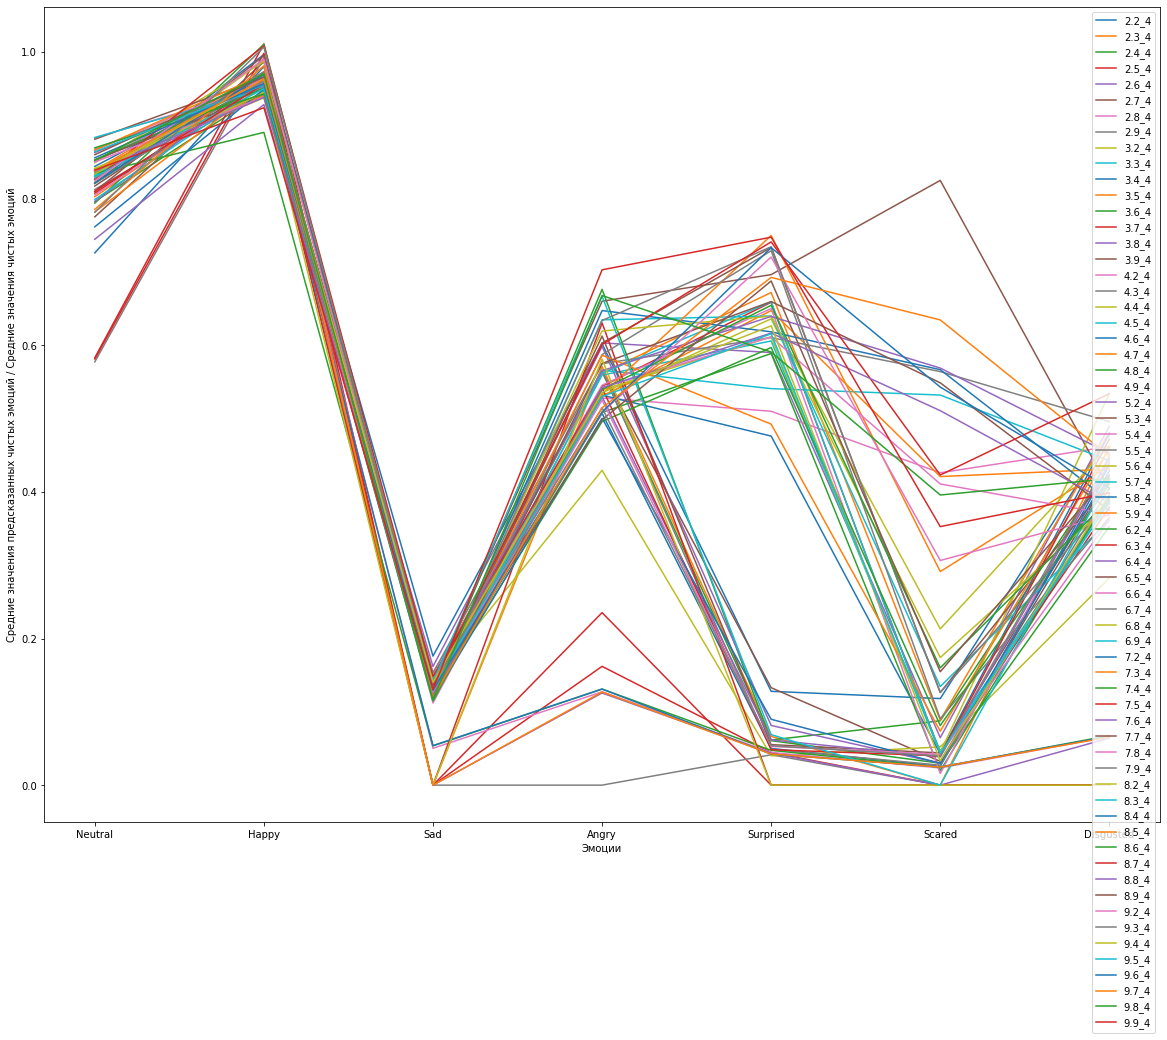

In [42]:
kwargs = {
    'models': models_4, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [43]:
df_clear_metrics_4.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
31,5.9_4,0.781912,0.955752,0.140044,0.533350,0.749808,0.291346,0.435624,0.555405
6,2.8_4,0.851012,0.961798,0.154071,0.528109,0.509967,0.426075,0.461815,0.556121
21,4.7_4,0.839597,0.940829,0.119277,0.530415,0.647264,0.420930,0.431046,0.561337
54,8.8_4,0.836906,0.938334,0.121155,0.542151,0.616625,0.510786,0.385200,0.564451
62,9.8_4,0.852213,0.970059,0.116740,0.667839,0.590760,0.395771,0.417982,0.573052
19,4.5_4,0.831110,0.960140,0.143117,0.565935,0.540871,0.532099,0.442415,0.573670
45,7.7_4,0.852788,0.942899,0.119712,0.575155,0.659622,0.548776,0.374637,0.581941
63,9.9_4,0.838955,0.924005,0.130609,0.702910,0.747432,0.352663,0.398763,0.585048
60,9.6_4,0.855775,0.956715,0.129386,0.508971,0.733150,0.542975,0.405267,0.590320
30,5.8_4,0.834725,0.968909,0.123945,0.647328,0.618325,0.566701,0.387386,0.592474


In [44]:
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_4/df_clear_metrics_4.db'

In [45]:
tools.save_to_db(db_path, name_db, df_clear_metrics_4)

In [46]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,2.2_4,0.726042730172183,0.980208224028173,0.176010263136185,0.602130990045074,0.127956196096227,0.118089569549935,0.47836593343518,0.458400558066137
1,2.3_4,0.838932394373049,0.972775565230192,4.90015745008156e-10,0.570912511373763,0.0664729151235346,3.97846853500743e-09,0.461127605129954,0.415745856528425
2,2.4_4,0.796011696788432,0.945747602489045,0.136040495900458,0.563981858546147,0.0616449117142762,0.0877325441323075,0.435743049734949,0.432414594186516
3,2.5_4,0.582950398444545,1.01113075660507,6.68720684741022e-26,0.235278305957309,5.86824131544733e-15,1.1392923314856e-23,3.45094929054798e-21,0.261337065858133
4,2.6_4,0.829905192446626,0.941674140514755,0.161856030322104,0.603203901471168,0.590121211733894,0.0647241432292789,0.489434310865353,0.525845561511883
...,...,...,...,...,...,...,...,...,...
59,9.5_4,0.864100422171044,0.955115098700908,0.130564153855652,0.530116048966433,0.615677811189854,0.0430580484224301,0.385125250214705,0.503393833360147
60,9.6_4,0.85577529944992,0.956714570378934,0.129386389453891,0.508970666237723,0.73315042683944,0.542975465456645,0.405266989756675,0.590319972510461
61,9.7_4,0.837417884027746,0.963095773525476,0.119779329811903,0.514698746324003,0.692581533971472,0.63453684834873,0.448868408939016,0.601568360706907
62,9.8_4,0.852213012464048,0.970058881191151,0.116740161237173,0.667838888936171,0.59076041873749,0.395770517050051,0.417982201879539,0.573052011642232


In [47]:
v = 5
models_5 = tools.load_models('../saved_models', df, layer, v)
models_5

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['2.2_5', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f491cb9adc0>],
 ['2.3_5', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f4942df0790>],
 ['2.4_5', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f494e12cc40>],
 ['2.5_5', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f49254b63d0>],
 ['2.6_5', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f49435b3dc0>],
 ['2.7_5', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f491cc36c10>],
 ['2.8_5', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f4925193b20>],
 ['2.9_5', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f49462ec430>],
 ['3.2_5', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f491de0b580>],
 ['3.3_5', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f491c9a6d30>],
 ['3.4_5', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f4942f918b0>],
 ['3.5_5', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f491ad85d00>],
 ['3.6_5', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [48]:
len(models_5)

64

In [49]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

,model,layer,N,mean,norm,stat


In [50]:
df_metrics_5 = tools.create_df_metrics(models_5, test, df_metrics_5, layer=layer)
df_metrics_5

,model,layer,N,mean,norm,stat
0,2.2_5,second,2.2,0.078289,0.214014,0.507822
1,2.3_5,second,2.3,0.067130,0.182908,0.480687
2,2.4_5,second,2.4,0.062440,0.169979,0.480935
3,2.5_5,second,2.5,0.085538,0.249614,0.485652
4,2.6_5,second,2.6,0.062360,0.169063,0.548877
...,...,...,...,...,...,...
59,9.5_5,second,9.5,0.053527,0.147115,0.526611
60,9.6_5,second,9.6,0.050940,0.140930,0.520589
61,9.7_5,second,9.7,0.054568,0.153311,0.554506
62,9.8_5,second,9.8,0.051190,0.142700,0.563049


In [51]:
df_metrics_5.sort_values('mean')

,model,layer,N,mean,norm,stat
35,6.5_5,second,6.5,0.050128,0.138740,0.529377
63,9.9_5,second,9.9,0.050219,0.139397,0.569504
30,5.8_5,second,5.8,0.050612,0.141582,0.559874
55,8.9_5,second,8.9,0.050621,0.139899,0.524054
53,8.7_5,second,8.7,0.050669,0.139499,0.545283
...,...,...,...,...,...,...
24,5.2_5,second,5.2,0.084312,0.230442,0.489063
16,4.2_5,second,4.2,0.084487,0.227757,0.493763
3,2.5_5,second,2.5,0.085538,0.249614,0.485652
13,3.7_5,second,3.7,0.088177,0.252570,0.488006


In [52]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_5/df_metrics_5.db'

In [53]:
tools.save_to_db(db_path, name_db, df_metrics_5)

In [54]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,2.2_5,second,2.2,0.078288866930752,0.214013537081444,0.507821500301361
1,2.3_5,second,2.3,0.0671301471251982,0.182908444784431,0.480686992406845
2,2.4_5,second,2.4,0.062439912152956,0.169978745240134,0.480934798717499
3,2.5_5,second,2.5,0.085537606727829,0.249613651221362,0.48565199971199
4,2.6_5,second,2.6,0.0623601770234475,0.169063290724588,0.548876881599426
...,...,...,...,...,...,...
59,9.5_5,second,9.5,0.0535267180562294,0.147115388667942,0.526611030101776
60,9.6_5,second,9.6,0.0509397450573917,0.140929614975234,0.52058869600296
61,9.7_5,second,9.7,0.0545678532288276,0.153311266001328,0.554505944252014
62,9.8_5,second,9.8,0.0511900853752109,0.142699718802754,0.563049137592316


In [55]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


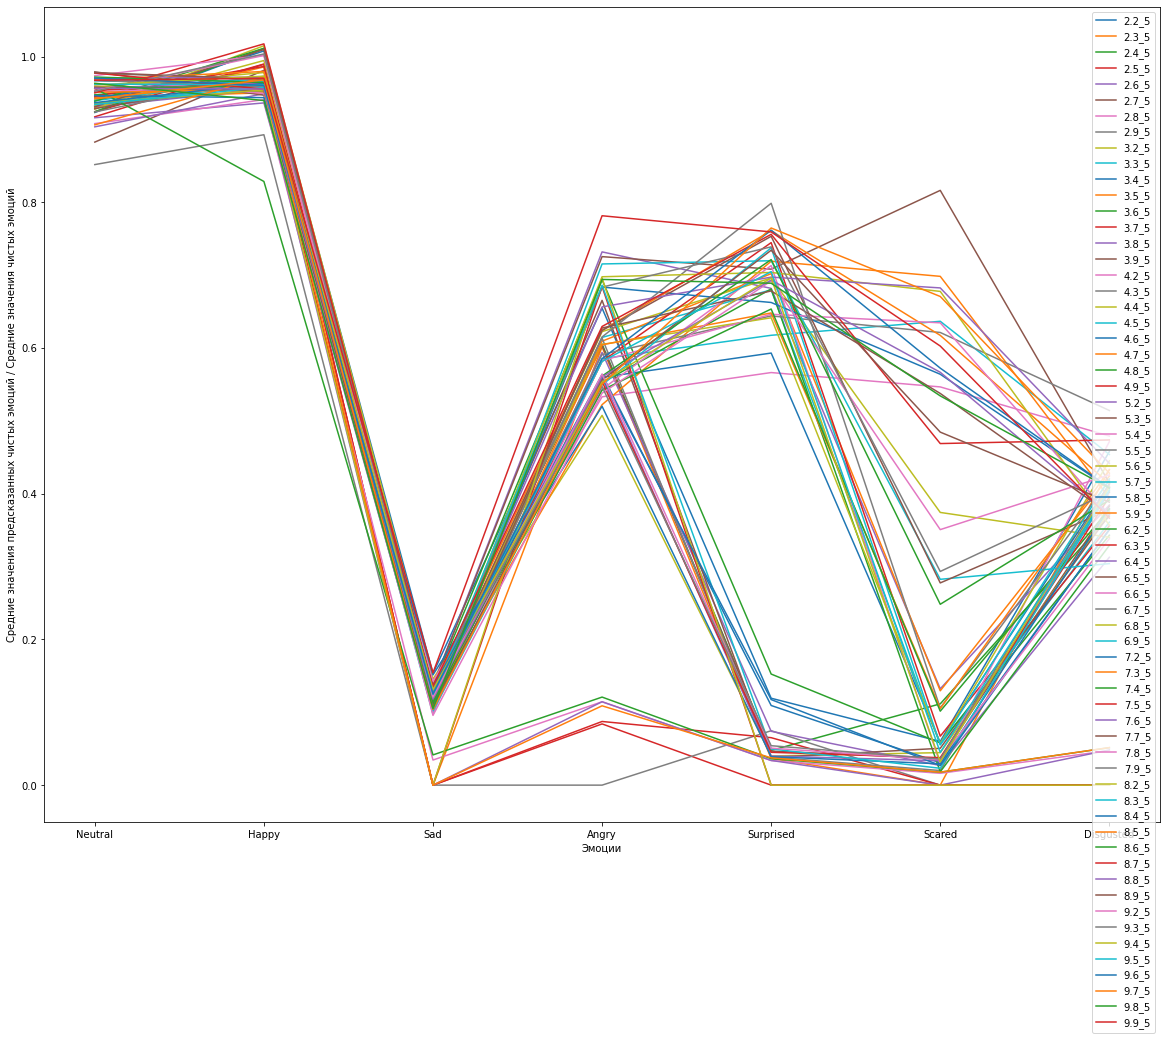

In [56]:
kwargs = {
    'models': models_5, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [57]:
df_clear_metrics_5.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
45,7.7_5,0.958005,0.953385,0.107161,0.627545,0.678369,0.537679,0.372491,0.604948
36,6.6_5,0.970177,0.949539,0.099818,0.582718,0.646368,0.634633,0.371415,0.607810
19,4.5_5,0.939591,0.969357,0.113501,0.585409,0.617514,0.636728,0.453875,0.616568
62,9.8_5,0.963462,0.939750,0.104992,0.694184,0.688991,0.534319,0.407675,0.619053
21,4.7_5,0.943389,0.950312,0.114980,0.522277,0.719187,0.698421,0.394302,0.620410
30,5.8_5,0.967033,0.962084,0.107984,0.683699,0.662557,0.564022,0.407899,0.622183
60,9.6_5,0.970491,0.960604,0.125196,0.585430,0.761787,0.572405,0.408241,0.626308
53,8.7_5,0.977500,0.955434,0.135462,0.629642,0.756114,0.468877,0.473872,0.628129
61,9.7_5,0.942049,0.968012,0.103974,0.550379,0.764788,0.670781,0.428262,0.632606
27,5.5_5,0.977555,0.967747,0.121151,0.591163,0.644133,0.621362,0.514292,0.633915


In [50]:
v = 5
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/second/_5/df_clear_metrics_5.db'

In [59]:
tools.save_to_db(db_path, name_db, df_clear_metrics_5)

In [51]:
connection = sqlite3.connect(db_path)
df_clear_metrics_5 = pd.read_sql(f'select * from {name_db}', con=connection)

In [41]:
df_clear_metrics

NameError: name 'df_clear_metrics' is not defined

In [55]:
df_clear_metrics_5.sort_values('clear')[:10]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
7,2.9_5,0.851832194872403,0.89282485606137,6.58953144813633e-17,1.08850992526569e-10,0.074706673932788,1.544430451937e-06,1.36669313652023e-14,0.25990932420084
3,2.5_5,0.924479720494679,0.989850217029664,6.62039963592584e-14,0.0840552504171151,1.8588342354813e-08,8.05207361163335e-12,1.31950746311842e-11,0.285483600935873
24,5.2_5,0.903654412411505,0.949123613218653,2.52955778528188e-08,0.114482235046084,0.0338918420073885,2.40401159627239e-11,0.0483544351099927,0.29278665187332
32,6.2_5,0.956567678434018,0.828678306072409,0.0414855660141554,0.120869240655087,0.0363256888434322,0.017778639334674,0.051413065480987,0.293302597833538
13,3.7_5,0.917462639284027,0.989546980191549,4.81895510465273e-10,0.0873799063917358,0.065146947358531,4.26784881944835e-09,1.81067317899756e-10,0.294219496879522
51,8.5_5,0.906376954024362,0.972302625248632,2.74208242940555e-07,0.108899476925996,0.0374553760072272,0.017805592905657,0.0515249057656409,0.299195029297965
16,4.2_5,0.908089051516257,0.941062062203219,0.0344290736053145,0.114413586770083,0.0337865061234732,0.0162266870485801,0.047432454895302,0.299348488880319
48,8.2_5,0.936310798398182,0.954244881314416,0.0,0.696148388305095,3.72337273649138e-11,6.67265040581148e-29,5.77252409050277e-39,0.369529152579275
33,6.3_5,0.953812712575738,0.963419538969652,0.0,0.684439148340927,0.000195754987850741,0.0,0.0,0.371695307839167
14,3.8_5,0.916110615166724,0.936501909339816,0.103648449700155,0.594010035938811,0.0739190818080478,0.0269233650874858,0.312746658812474,0.423408587979073
